## IMPORT

### Import Statements

In [33]:
# Libraries such as Pandas, NumPy, Sklearn, Matplotlib and Seaborn, were mainly used to manipulate and analyze the data.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [34]:
# Import and print the first 5 instances
df = pd.read_csv('DataSet2.csv', header=0)
print('Frist 5 rows:\n', df.head())
df_copy = df.copy(deep=True)
# print('Frist 5 rows:\n', df_copy.head())

Frist 5 rows:
    y x1        x2        x3        x4        x5        x6        x7        x8  \
0  0  a -0.375866  0.427942 -0.922338  0.210758  0.109015  0.621001 -0.444421   
1  0  b  0.047819  0.115627 -1.781739 -0.272785  0.392783  1.094168 -0.975254   
2  1  d  0.372868 -0.263291 -1.120545 -0.773828  0.830072 -1.727836  1.323876   
3  0  c  0.059598  0.270797  0.961795 -1.804197  2.931330  1.891656  0.094252   
4  1  d  0.616319  0.291275 -1.113519  0.626864 -0.287989 -0.842649 -0.947257   

         x9       x10       x11  
0  0.089970 -0.707711  0.473700  
1 -0.353424  0.145543 -0.064961  
2 -1.587291 -0.024916  0.082491  
3 -0.873467 -1.217680 -1.848046  
4  1.198215  0.972420 -1.054313  


## EXPLORATORY DATA ANALYSIS

### Data Exploration

In [35]:
# We can see that there is only 1 categorical feature 'x1' and 10 numerical features, excluding the binary target 'y'.
print('Basic information on the data:')
print(df.info())

Basic information on the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1700 non-null   int64  
 1   x1      1700 non-null   object 
 2   x2      1700 non-null   float64
 3   x3      1700 non-null   float64
 4   x4      1700 non-null   float64
 5   x5      1700 non-null   float64
 6   x6      1700 non-null   float64
 7   x7      1700 non-null   float64
 8   x8      1700 non-null   float64
 9   x9      1700 non-null   float64
 10  x10     1700 non-null   float64
 11  x11     1700 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 159.5+ KB
None


In [36]:
# By looking at the max values, it can be inferred that the data will need to be standardized.
print('Data Description:')
df.describe()

Data Description:


,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.411765,-0.066277,0.025411,-0.004941,-0.018150,0.004139,-0.004442,0.039203,-0.024454,-0.008586,0.005379
std,0.492298,0.421414,0.284509,1.001383,0.983988,1.031957,1.033610,0.978798,0.987621,0.993979,1.017824
min,0.000000,-0.925228,-0.931249,-3.547109,-4.166713,-3.271321,-3.050503,-3.188723,-3.691485,-3.426298,-4.075024
25%,0.000000,-0.383928,-0.189961,-0.693761,-0.630827,-0.717443,-0.679205,-0.606272,-0.691628,-0.643558,-0.679580
50%,0.000000,0.018826,0.011861,0.002496,0.008173,0.015596,-0.021232,0.049557,-0.040668,0.012354,0.009655
75%,1.000000,0.156138,0.270204,0.697783,0.638092,0.748816,0.713769,0.673363,0.629988,0.654637,0.692432
max,1.000000,0.696405,0.567431,2.977407,3.434698,3.575212,3.387439,4.651006,3.763927,3.259833,3.095674


In [37]:
# Dimensions of the data
# we have 1700 rows and 12 columns
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=('rows', 'columns'))

,rows,columns
0,1700,12


In [38]:
# Check for missing values or nan values
# There are no missing or nan values present in the data
# We do also do not need to check for any identifiers (columns with unique values), based on the previous descriptions
df.isna().count()

y      1700
x1     1700
x2     1700
x3     1700
x4     1700
x5     1700
x6     1700
x7     1700
x8     1700
x9     1700
x10    1700
x11    1700
dtype: int64

### Data Visualization

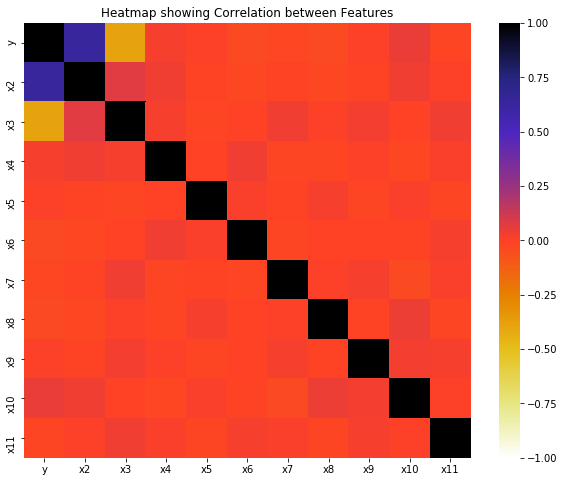

In [39]:
# Using Seaborn library, we can check for the correlation between the features.
# Note - this only takes into account numerical features

# Create the correlation matrix using pandas
df_corr = df.corr()
# print(df_corr)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10,8))
corr_plot = sns.heatmap(df_corr, vmin=-1, vmax=1, center=0, 
                        cmap=plt.cm.CMRmap_r).set_title('Heatmap showing Correlation between Features')
plt.show()



##### Observation
- We can see that the target 'y' and the feature 'x2' are positively correlated to each other
- Target 'y' and the feature 'x3' are negatively correlated to each other - we may not require this feature during prediction (part of feature selection)
- The remaining predictors do not seem to be correlated with each other mainly

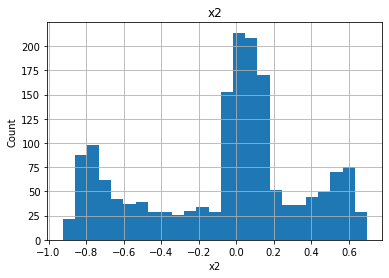

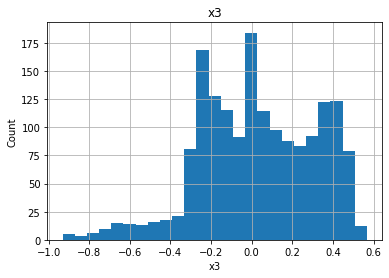

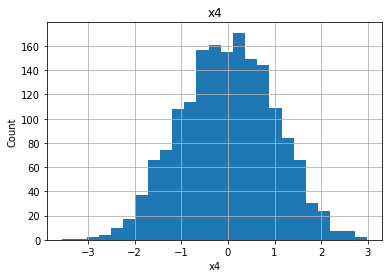

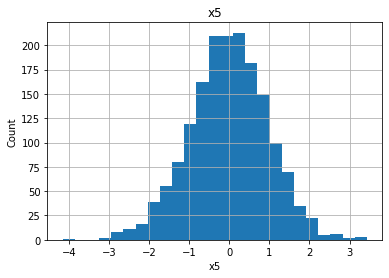

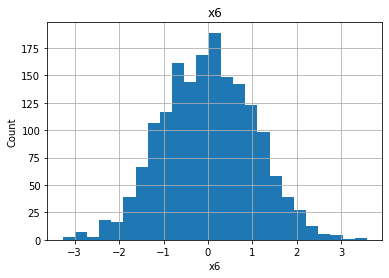

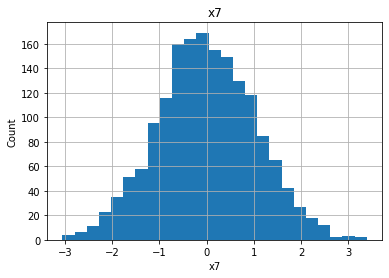

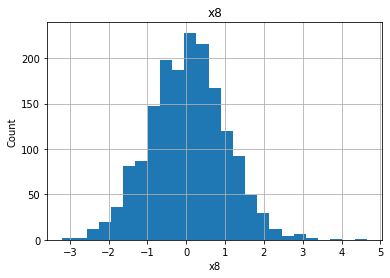

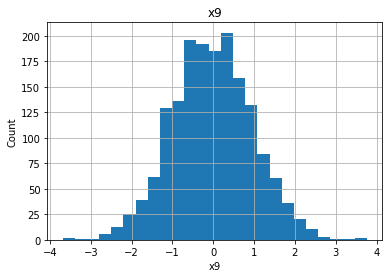

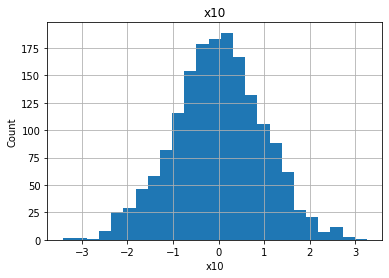

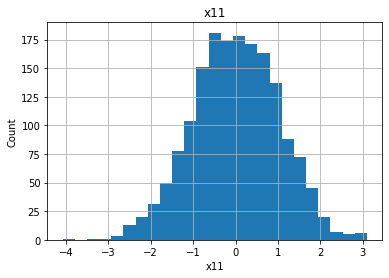

In [40]:
# Visualization of Continuous (or numerical) features
df_copy = df.copy()
df_cont_feat = df_copy.drop(columns=['y','x1'], axis=1)
# print(df_cont_feat.head())

for cont_feat in df_cont_feat.columns:
    df[cont_feat].hist(bins=25)
    plt.xlabel(cont_feat)
    plt.ylabel("Count")
    plt.title(cont_feat)
    plt.show()
    
# We can clearly see that features 'x2' and 'x3' are not normally distributed
# The remaining features are normally distributed.

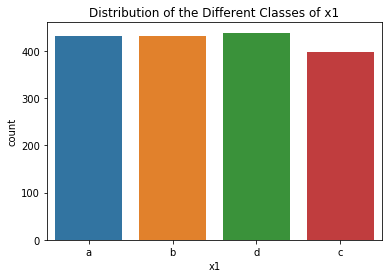

In [41]:
# Visualization of Categorical feature
# Classes 'a', 'b', and 'd' have almost the same number of instances. Class 'c' has the least number of instances.
sns.countplot(x='x1', data=df)
plt.title('Distribution of the Different Classes of x1')
plt.show()

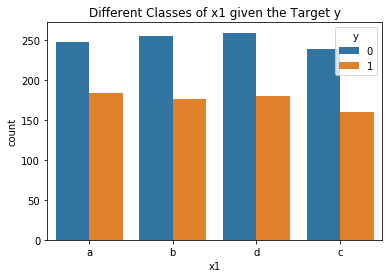

In [42]:
# We can clearly see that all the 4 classes of feature 'x1', have more instances of y=0 than y=1
sns.countplot(x='x1', hue='y', data=df)
plt.title('Different Classes of x1 given the Target y')
plt.show()

## FEATURE ENGINEERING

In [43]:
# As seen in the heatmap of the correlation values, 'x3' is negatively correlated to the target 'y'
# Hence, we can remove it from the modeling process
df = df.drop(columns='x3')
print(df.head())

   y x1        x2        x4        x5        x6        x7        x8        x9  \
0  0  a -0.375866 -0.922338  0.210758  0.109015  0.621001 -0.444421  0.089970   
1  0  b  0.047819 -1.781739 -0.272785  0.392783  1.094168 -0.975254 -0.353424   
2  1  d  0.372868 -1.120545 -0.773828  0.830072 -1.727836  1.323876 -1.587291   
3  0  c  0.059598  0.961795 -1.804197  2.931330  1.891656  0.094252 -0.873467   
4  1  d  0.616319 -1.113519  0.626864 -0.287989 -0.842649 -0.947257  1.198215   

        x10       x11  
0 -0.707711  0.473700  
1  0.145543 -0.064961  
2 -0.024916  0.082491  
3 -1.217680 -1.848046  
4  0.972420 -1.054313  


In [44]:
# Exploring the categorical variable by looking at the unique classes in it
df['x1'].unique()

array(['a', 'b', 'd', 'c'], dtype=object)

In [45]:
# Encoding the categorical feature 'x1'
# Dummy encoding is used as it is faster, because of fewer classes and because it uses N-1 label/categories
df = pd.get_dummies(df)
df.head()

,y,x2,x4,x5,x6,x7,x8,x9,x10,x11,x1_a,x1_b,x1_c,x1_d
0,0,-0.375866,-0.922338,0.210758,0.109015,0.621001,-0.444421,0.089970,-0.707711,0.473700,1,0,0,0
1,0,0.047819,-1.781739,-0.272785,0.392783,1.094168,-0.975254,-0.353424,0.145543,-0.064961,0,1,0,0
2,1,0.372868,-1.120545,-0.773828,0.830072,-1.727836,1.323876,-1.587291,-0.024916,0.082491,0,0,0,1
3,0,0.059598,0.961795,-1.804197,2.931330,1.891656,0.094252,-0.873467,-1.217680,-1.848046,0,0,1,0
4,1,0.616319,-1.113519,0.626864,-0.287989,-0.842649,-0.947257,1.198215,0.972420,-1.054313,0,0,0,1


In [46]:
# Getting the features and target
# We select 'y' as the target variable, drop it from the main 'df' dataframe and then store the remainder columns
# in X dataframe
target = 'y'
y = df[target]
X = df.drop(columns=target)

In [47]:
# Print the first 5 rows of the Features and the Target
print('Features:\n', X.head())
print('Target:\n', y.head())

Features:
          x2        x4        x5        x6        x7        x8        x9  \
0 -0.375866 -0.922338  0.210758  0.109015  0.621001 -0.444421  0.089970   
1  0.047819 -1.781739 -0.272785  0.392783  1.094168 -0.975254 -0.353424   
2  0.372868 -1.120545 -0.773828  0.830072 -1.727836  1.323876 -1.587291   
3  0.059598  0.961795 -1.804197  2.931330  1.891656  0.094252 -0.873467   
4  0.616319 -1.113519  0.626864 -0.287989 -0.842649 -0.947257  1.198215   

        x10       x11  x1_a  x1_b  x1_c  x1_d  
0 -0.707711  0.473700     1     0     0     0  
1  0.145543 -0.064961     0     1     0     0  
2 -0.024916  0.082491     0     0     0     1  
3 -1.217680 -1.848046     0     0     1     0  
4  0.972420 -1.054313     0     0     0     1  
Target:
 0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64


In [48]:
# We split the data using the train_test_split function from sklearn. 
# Setting the test data to be 30% and trin data to be 70% of the total data
# A random state of 42 is used (by default) to generate reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Print the shapes of the split data
print('X_train data shape: ', X_train.shape)
print('X_test data shape: ', X_test.shape)
print('y_train data shape: ', y_train.shape)
print('y_test data shape: ', y_test.shape)

X_train data shape:  (1190, 13)
X_test data shape:  (510, 13)
y_train data shape:  (1190,)
y_test data shape:  (510,)


##### Observation
- Since most of the predictors follow a normal distribution, we use the StandardScaler function from sklearn
- This gives the data a mean of 0 and a standard devisation of 1. It also maintain useful information about the outliers and makes algorithms less sensitive to them

In [50]:
# Scaling the data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## PREDICTIVE MODELING

### Logistic Regression

In [51]:
# Training
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prediction
predictn_lr = log_reg.predict(X_test)

# Performance 
class_report_lr = classification_report(y_test, predictn_lr, output_dict=True)
table_report_lr = pd.DataFrame(class_report_lr).transpose()
print('Classification Report for Logistic Regression:')
print(table_report_lr)

# Confusion Matrix
# print(confusion_matrix(y_test, predictn_lr))

Classification Report for Logistic Regression:
              precision    recall  f1-score     support
0              0.710280  0.838235  0.768971  272.000000
1              0.767196  0.609244  0.679157  238.000000
accuracy       0.731373  0.731373  0.731373    0.731373
macro avg      0.738738  0.723739  0.724064  510.000000
weighted avg   0.736841  0.731373  0.727058  510.000000


### Decision Tree Classifier

In [52]:
# Training
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Prediction
predictn_dtc = dtc.predict(X_test)

# Performance 
class_report_dtc = classification_report(y_test, predictn_dtc, output_dict=True)
table_report_dtc = pd.DataFrame(class_report_dtc).transpose()
print('Classification Report for Decision Tree Classifier:')
print(table_report_dtc)

# Confusion Matrix
# print(confusion_matrix(y_test, predictn_dtc))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score     support
0              0.837288  0.908088  0.871252  272.000000
1              0.883721  0.798319  0.838852  238.000000
accuracy       0.856863  0.856863  0.856863    0.856863
macro avg      0.860505  0.853204  0.855052  510.000000
weighted avg   0.858957  0.856863  0.856132  510.000000


### Support Vector Machine Classifier

In [53]:
# Training - SVC using Linear Kernel
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Prediction
predictn_svm = svm.predict(X_test)

# Performance 
class_report_svm = classification_report(y_test, predictn_svm, output_dict=True)
table_report_svm = pd.DataFrame(class_report_svm).transpose()
print('Classification Report for Decision Tree Classifier:')
print(table_report_svm)

# Confusion Matrix
# print(confusion_matrix(y_test, predictn_svm))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score     support
0              0.729050  0.959559  0.828571  272.000000
1              0.927632  0.592437  0.723077  238.000000
accuracy       0.788235  0.788235  0.788235    0.788235
macro avg      0.828341  0.775998  0.775824  510.000000
weighted avg   0.821722  0.788235  0.779341  510.000000


### K Nearest Neighbor Classifier

In [54]:
# Training 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prediction
predictn_knn = knn.predict(X_test)

# Performance 
class_report_knn = classification_report(y_test, predictn_knn, output_dict=True)
table_report_knn = pd.DataFrame(class_report_knn).transpose()
print('Classification Report for Decision Tree Classifier:')
print(table_report_knn)

# Confusion Matrix
# print(confusion_matrix(y_test, predictn_svm))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score     support
0              0.678808  0.753676  0.714286  272.000000
1              0.677885  0.592437  0.632287  238.000000
accuracy       0.678431  0.678431  0.678431    0.678431
macro avg      0.678346  0.673057  0.673286  510.000000
weighted avg   0.678377  0.678431  0.676020  510.000000


### Random Forrest Classifier

In [55]:
# Training
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Prediction
predictn_rfc = rfc.predict(X_test)

# Performance 
class_report_rfc = classification_report(y_test, predictn_rfc, output_dict=True)
table_report_rfc = pd.DataFrame(class_report_rfc).transpose()
print('Classification Report for Random Forrest Classifier:')
print(table_report_rfc)

# Confusion Matrix
# print(confusion_matrix(y_test, predictn_rfc))

Classification Report for Random Forrest Classifier:
              precision    recall  f1-score    support
0              0.796970  0.966912  0.873754  272.00000
1              0.950000  0.718487  0.818182  238.00000
accuracy       0.850980  0.850980  0.850980    0.85098
macro avg      0.873485  0.842700  0.845968  510.00000
weighted avg   0.868384  0.850980  0.847820  510.00000


### XgBoost Classifier

In [56]:
# Training
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Prediction
predictn_xgb = xgb.predict(X_test)

# Performance 
class_report_xgb = classification_report(y_test, predictn_xgb, output_dict=True)
table_report_xgb = pd.DataFrame(class_report_xgb).transpose()
print('Classification Report for XgBoost Classifier')
print(table_report_xgb)

# Confusion Matrix
# print(confusion_matrix(y_test, predictn_xgb))

Classification Report for XgBoost Classifier
              precision    recall  f1-score     support
0              0.852349  0.933824  0.891228  272.000000
1              0.915094  0.815126  0.862222  238.000000
accuracy       0.878431  0.878431  0.878431    0.878431
macro avg      0.883722  0.874475  0.876725  510.000000
weighted avg   0.881630  0.878431  0.877692  510.000000


In [57]:
# Best model, using model accuracy
# Since the data is a well balanced dataset, we can use the accuracy of a model to determine performance of eahc model
model_comparision = pd.DataFrame({'Model Accuracy':[accuracy_score(y_test,predictn_lr),
                                                   accuracy_score(y_test,predictn_dtc),
                                                   accuracy_score(y_test,predictn_svm),
                                                   accuracy_score(y_test,predictn_knn),
                                                   accuracy_score(y_test,predictn_rfc),
                                                   accuracy_score(y_test,predictn_xgb)]},
                                index = ['Logistic Regression', 'Decision Tree', 'SVM Classifier', 'KNN Classifier',
                                         'Random Forrest','XgBoost Classifier'])
print(model_comparision)

                     Model Accuracy
Logistic Regression        0.731373
Decision Tree              0.856863
SVM Classifier             0.788235
KNN Classifier             0.678431
Random Forrest             0.850980
XgBoost Classifier         0.878431


In [58]:
# Confusion Matrix for XgBoost
print('Confusion Matrix of XgBoost model:')
print(confusion_matrix(y_test, predictn_xgb))

# Classification Report 
print('Classification Report for XgBoost Classifier:')
print(table_report_xgb)

Confusion Matrix of XgBoost model:
[[254  18]
 [ 44 194]]
Classification Report for XgBoost Classifier:
              precision    recall  f1-score     support
0              0.852349  0.933824  0.891228  272.000000
1              0.915094  0.815126  0.862222  238.000000
accuracy       0.878431  0.878431  0.878431    0.878431
macro avg      0.883722  0.874475  0.876725  510.000000
weighted avg   0.881630  0.878431  0.877692  510.000000


##### Observation
- Looking at the model accuracies, we can clearly see that XgBoost Classifier is out best model initially with an accuracy of 87.8%
- However, taking a look at some of the data points that are not classified correctly by this model
- The Confusion Matrix gives us True Positive (TP), False Positive (FP), False Negative (FN) and True Negative (TN) values
- WE can see that, the model has falsely predicted at total of (18+44)=62 values out of 510 test values 
- Type I error occured for 18 instances, where the actual value was negative and predicted as positive  
- Type II error occured for 44 instances, where the actual value was positive, but was predicted as negative
- Compared to the total number of instances (as seen under Support, of the classification report), for each class, the Type I & II errors were not very high

### Answers to Section A

In [59]:
# Now we check for those data points where the model does not perform as well i.e. misclassifies as the opposite class
# A simple for loop running for the length of y_test values allows us to check which instances of the test set were
# misclassified
print('Misclassified Instances:')
for i in range(len(y_test)):
    if y_test.iloc[i] != predictn_xgb[i]:
        print(i, y_test.iloc[i], "!=", predictn_xgb[i])
        
# Printing some of those instances
# X_test is a numpy array, hence, we do not observe the values as a dataframe
print('X_test[8]:', X_test[8])
print('X_test[160]:', X_test[160])
print('X_test[443]:', X_test[443])

Misclassified Instances:
8 1 != 0
32 1 != 0
38 1 != 0
40 1 != 0
62 1 != 0
73 0 != 1
77 1 != 0
85 1 != 0
95 1 != 0
109 1 != 0
123 0 != 1
126 1 != 0
129 1 != 0
136 0 != 1
144 0 != 1
145 0 != 1
148 0 != 1
157 1 != 0
160 1 != 0
174 1 != 0
180 1 != 0
187 1 != 0
196 1 != 0
203 1 != 0
206 1 != 0
210 1 != 0
213 1 != 0
238 1 != 0
240 1 != 0
245 0 != 1
246 1 != 0
253 1 != 0
262 1 != 0
271 1 != 0
285 0 != 1
292 0 != 1
297 1 != 0
302 1 != 0
319 1 != 0
327 1 != 0
332 1 != 0
352 0 != 1
360 1 != 0
388 0 != 1
390 1 != 0
393 0 != 1
395 0 != 1
398 1 != 0
399 0 != 1
401 0 != 1
414 1 != 0
434 1 != 0
443 1 != 0
445 1 != 0
446 1 != 0
453 1 != 0
464 0 != 1
471 0 != 1
489 0 != 1
494 1 != 0
504 1 != 0
509 1 != 0
X_test[8]: [ 0.37265631  1.04827797  0.43771119 -0.82355765 -1.10923963  1.69003272
 -1.15637339 -0.26957453  0.13073127  1.73399366 -0.59093684 -0.55210919
 -0.58964258]
X_test[160]: [ 0.40809374 -0.29192459  0.8078069  -0.39394093 -0.82831485 -1.64976682
 -2.41053026 -0.28890127  0.66569653  1.733993

##### Observation
- By looking at some of the misclassified examples, we can see that some columns do not seem to have standardized values
- This simply implies that the values seem to vary. This can be solved by using other normalization or standardization 
- techniques. 
- These values can be outliers, which can be removed through further pre-processing and feature selection. Further,
- improvements can be made to the model, itself using hyperparameter tuning.

In [60]:
# Write about xgboost limitations and hyperparameter tuning to improve model

### Answers to Section B

#### Q1. A few days after you finish the initial model, you learn new information that the value of the X2 feature makes sense only if it is positive (i.e. X2 > 0 should be in the model instead of original X2). Show how you would address this issue.
#### Answer 1.
- We can use the function described below and a slightly modified version of it to answer the question stated above. 
- In order to implement the solution, we must think about whether that dataset is imbalanced or not.
- In our case, we observe that the data is not an imbalanced one, hence, if we need to check, how many values in x2 are greater than 0 and how many are lesser than 0.
- We can observe that there are 907 positive values (x2>0) and 793 negative values (x2<=0)
- Hence, if we were to consider only positive values, it would lead to the data being reduced greatly.
- We can now do one of the following: 
  - Remove the feature, but performing feature selection
  - Impute the feature using to convert negative values to a mean of the positive values

In [61]:
positive = 0
negative = 0
for val in df['x2']:
    if val <=0:
        negative += 1
    else:
        positive += 1
print('Total Positive values in x2:', positive, '\nTotal Negative values in x2:', negative)

Total Positive values in x2: 907 
Total Negative values in x2: 793


#### Q2. Later, you additionally learn that X4 should’ve been used as an indicator variable (e.g. X4 that is greater than a certain threshold should be treated differently than X4 values below that threshold). However, you don’t know the value of threshold. Adapt your code to support a systematic way of finding threshold which leads to improved model performance.
#### Q3. Now that you realize feature engineering is a frequent need for improving our models, you want to create a general framework to tackle such situations (e.g. conversion to indicators, defining certain thresholds, etc.). What function/module do you develop to enable user-defined column conversions for given thresholds? Suppose thresholds are given to you as arguments to your function. 
#### Answer 2&3.
- An indicator variable is a dummy variable that numerically represents a categorical feature. In the case where we take 'x4' column to be an indicator variable, we can use the following function to input a threshold and increase model performance
- To answer questions in section B, there are 2 main things to consider: 
  - Finding the best threshold to distinguish the classes in for the indicator variable 
  - Using the threshold to increase model performance

In [62]:
df_copy.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,0,a,-0.375866,0.427942,-0.922338,0.210758,0.109015,0.621001,-0.444421,0.089970,-0.707711,0.473700
1,0,b,0.047819,0.115627,-1.781739,-0.272785,0.392783,1.094168,-0.975254,-0.353424,0.145543,-0.064961
2,1,d,0.372868,-0.263291,-1.120545,-0.773828,0.830072,-1.727836,1.323876,-1.587291,-0.024916,0.082491
3,0,c,0.059598,0.270797,0.961795,-1.804197,2.931330,1.891656,0.094252,-0.873467,-1.217680,-1.848046
4,1,d,0.616319,0.291275,-1.113519,0.626864,-0.287989,-0.842649,-0.947257,1.198215,0.972420,-1.054313


##### Function - threshold_search() - To generalize the framework of tackling modifications (Answer 3.)
- This function aims to take a list of threshold values and tests each one to check for accuracy of the intial model/
- Usng a for loop, and list comprehension, we can set values of the specified column as 1 if value > threshold and 0 if value < threshold.
- The function takes are input a list of thresholds, the dataframe, the column we wish to manipulate, and for purposes of this exercise, the column we choose to drop (feature engineering), and the target variable.
- Once the specified column is converted into an indicator variable (binary values (1 & 0), we are able to continue the same steps of feature engineering, data splitting, scaling data, training and observing performance.

In [63]:
# Finding the best threshold 
def threshold_search(thresh_list, data, col, col_drop, targ):
    # Feature Engineering
    data = data.drop(columns=col_drop)
    
    for val in thresh_list:
        print('Threshold is:', val)
        # Use data
        # Filtering the threshold
        data[col] = [1 if val1>val else 0 for val1 in data[col]]
        # print(data.head(10))
               
        # Encoding Categorical Feature
        data = pd.get_dummies(data)
        
        # Getting the Features and Target
        target = targ
        y_copy = data[targ]
        X_copy = data.drop(columns=target)
        
        # Data Splitting
        X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size=0.3,
                                                                                random_state=42)
        
        # Scaling the Data
        ss = StandardScaler()
        X_train_copy = ss.fit_transform(X_train_copy)
        X_test_copy = ss.transform(X_test_copy)
        
        # Training - Using our best initial model
        xgb_c = XGBClassifier()
        xgb_c.fit(X_train_copy, y_train_copy)
        
        # Prediction
        predictn_xgb_c = xgb_c.predict(X_test_copy) 
        
        # Accuracy Score
        print('Accuracy Score for XgBoost model:', accuracy_score(y_test_copy,predictn_xgb_c))
    

print('Run the function!')
threshold_list = [0.5, -0.1]
threshold_search(threshold_list, df_copy, 'x4', 'x3', 'y')

Run the function!
Threshold is: 0.5
Accuracy Score for XgBoost model: 0.8784313725490196
Threshold is: -0.1
Accuracy Score for XgBoost model: 0.8725490196078431


##### Observation
- By looking at the output of the threshold_search(), we can observe that when the threshold is positive (e.g.: 0.5), the accuracy is the same as that of the model on original data. When we lower the threshold, (e.g.: -0.1), the accuracy drops from 87.8% to 87.2%. 

##### Function - threshold_criteria() - Specifically for Answer 2.
- This function aims to take take as input a single threshold, which we found using the function threshold_search(), and train the model and get the best performance.
- Similar to the previous function, instead of using a list of threshold, this function takes into account the best threshold we get from the previous function. 
- Then by completing the steps of feature engineering and modeling, we get the performance metric of the model.

In [64]:
def threshold_criteria(threshold, data, col, col_drop, targ):
    # Use data
    # Filtering the threshold
    data[col] = [1 if val>threshold else 0 for val in data[col]]
    data.head(10)
    
    # Feature Engineering
    data = data.drop(columns=col_drop)
    
    # Encoding Categorical Feature
    data = pd.get_dummies(data)
    
    # Getting the Features and Target
    target = targ
    y_copy = data[targ]
    X_copy = data.drop(columns=target)
    
    # Data Splitting
    X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size=0.3, random_state=42)
    
    # Scaling the Data
    ss = StandardScaler()
    X_train_copy = ss.fit_transform(X_train_copy)
    X_test_copy = ss.transform(X_test_copy)
    
    # Training - Using our best initial model
    xgb_c = XGBClassifier()
    xgb_c.fit(X_train_copy, y_train_copy)
    
    # Prediction
    predictn_xgb_c = xgb_c.predict(X_test_copy)
    
    # Performance 
    class_report_xgb_c = classification_report(y_test_copy, predictn_xgb_c, output_dict=True)
    table_report_xgb_c = pd.DataFrame(class_report_xgb_c).transpose()
    print('Classification Report for XgBoost Classifier')
    print(table_report_xgb_c)
    
    # Confusion Matrix for XgBoost
    print('Confusion Matrix of XgBoost model:')
    print(confusion_matrix(y_test_copy, predictn_xgb_c))     
    
    # Accuracy Score
    print('Accuracy Score for XgBoost model:', accuracy_score(y_test_copy,predictn_xgb_c))
    

print('Run the function!')
threshold_criteria(0.5, df_copy, 'x4', 'x3', 'y')

Run the function!
Classification Report for XgBoost Classifier
              precision    recall  f1-score     support
0              0.854730  0.930147  0.890845  272.000000
1              0.911215  0.819328  0.862832  238.000000
accuracy       0.878431  0.878431  0.878431    0.878431
macro avg      0.882972  0.874737  0.876838  510.000000
weighted avg   0.881090  0.878431  0.877772  510.000000
Confusion Matrix of XgBoost model:
[[253  19]
 [ 43 195]]
Accuracy Score for XgBoost model: 0.8784313725490196


### Notes and Observations
- The dataset was a fairly simple and clean one. In case more information (e.g.: domain knowledge, variable names, etc.) were to be given, the initial analysis and exploration would have been more in-depth.
- The 2 custom functions written to retrieve the threshold values and converting features to indicator variables, can be optimized further, b understanding the feature in question, provided we have additional information
- Furthermore, additional feature selection process and pipelines can be created for faster and efficient execution of the modeling process.
- While the initial models have been set with default parameters, each model has its own set of hyperparameters, that can be fine-tuned using methods such as GridSearchCV. This would allow us to find the best model.
- For more in-dept understanding, using the algorithms such as Random Forrest and KNN, feature importance can be found.